In [1]:
from shapely.geometry import Polygon 
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

sns.set_style('dark')
sns.set_palette('deep')
sns.set_context('notebook')
plt.rcParams['font.family']='serif'

### Check if you can scale without messing up centroids 

* This would let me only scale everything once 

<AxesSubplot:>

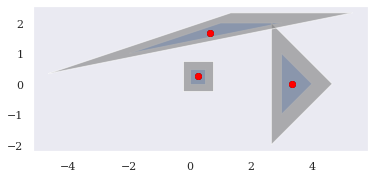

In [2]:
fig, ax = plt.subplots()

s1 = gpd.GeoSeries([Polygon([(0,0), (0.5,0), (0.5, 0.5), (0,0.5)]), Polygon([(3,-1), (4,0), ((3,1))]), Polygon([(-2,1), (3,2), (1,2)])])
s1.plot(ax=ax, color='cornflowerblue', alpha=0.6)
s2 = s1.scale(2,2,2, origin='centroid')
s2.plot(ax=ax, color='grey', alpha=0.6)
s2.centroid.plot(ax=ax, color='black', alpha=1)
s1.centroid.plot(ax=ax, color='red', alpha=1)

### My Comparison vs Ankits

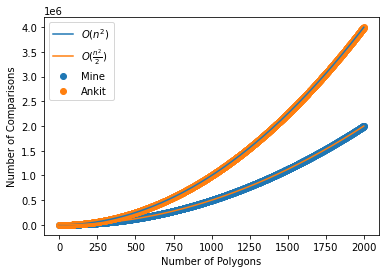

In [35]:
import numpy as np
import matplotlib.pyplot as plt 

def my_compare(n):
    s = 0 
    while n > 0: 
        n-=1
        s+=n
    return s

def ankit(n):
    return n*(n-1)

x = np.arange(1,2000,1)
my_y = np.array([my_compare(i) for i in x])
ankit_y = np.array([ankit(i) for i in x])

plt.scatter(x, my_y, label='Mine')
plt.scatter(x, ankit_y, label='Ankit')

plt.plot(x, x**2, label=r'$O(n^2)$')
plt.plot(x, x**2/2, label=r'$O(\frac{n^2}{2})$')

plt.legend()
plt.gca().set(xlabel='Number of Polygons', ylabel='Number of Comparisons')
plt.show()

### pygeos intersection

GEOSException: IllegalArgumentException: Points of LinearRing do not form a closed linestring

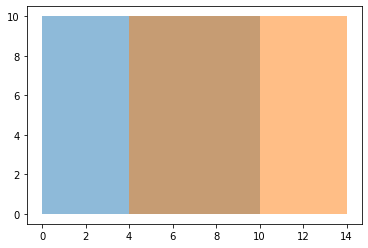

In [31]:
from pygeos import box, area, intersection, geometry 
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
import pygeos
import numpy as np

polygons_x = box(range(5), 0, range(10, 15), 10)
for i  in [0,4]:
    _ = np.transpose(pygeos.get_coordinates(polygons_x[i]))
    x = _[0]
    y = _[1]
    plt.fill(x,y, alpha=0.5)

a = geometry.Geometry('POLYGON ((3 -1, 4 0, 3 1))')
b = geometry.Geometry([(-2,1), (3,2), (1,2)])

intersection(a,b)